In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv
import pandas as pd

#pathing csv file
master_file = "insurance_agencies_even_cleaner.csv"

In [2]:
#read & print header for the csv
insurance_agencies=pd.read_csv("insurance_agencies_even_cleaner.csv")
insurance_agencies.head()


,Unnamed: 0,agency_name,agency_status,agency_address,agency_latitude,agency_longitude,latlng,city,GA_state,county,agency_simple
0,0,Roger Gilbert - Prudential Financial,OPERATIONAL,"180 East Dykes Street, Cochran",32.388932,-83.351960,"32.3889322,-83.35195999999998",Cochran,Georgia,Bleckley County,Roger Gilbert - Prudential Financial
1,1,Rutherford Insurance,OPERATIONAL,"401 North Grant Street, Fitzgerald",31.718610,-83.252750,"31.718610100000003,-83.25274999999998",Fitzgerald,Georgia,Ben Hill County,Rutherford Insurance
2,2,Global-Net Insurance,OPERATIONAL,"5305 Anson Avenue, Eastman",32.200026,-83.176214,"32.20002589999999,-83.17621390000001",Eastman,Georgia,Dodge County,Global-Net Insurance
3,3,Derek Hutcheson - State Farm Insurance Agent,OPERATIONAL,"401 Main Street, Eastman",32.195999,-83.174382,"32.1959994,-83.174382",Eastman,Georgia,Dodge County,Statefarm
4,4,Nationwide Insurance: Steve Allen Martin,OPERATIONAL,"207 South Grant Street, Fitzgerald",31.713272,-83.253073,"31.7132719,-83.2530731",Fitzgerald,Georgia,Ben Hill County,Nationwide


In [3]:
#grouping number of agencies
agencies_size = insurance_agencies.groupby(['agency_simple']).size().to_frame('size')
agencies_size

,size
agency_simple,
1st Choice Insurance Agency,1
A & A Tax & Financial Services,1
A Advantage Insurance,1
A-1 Auto Insurance,1
"A.W. Adams Insurance, LLC",1
...,...
Yates Insurance & Real Estate: Grimsley Wendell,1
Yeomans Agency,1
Zorn,1


In [4]:
#filtering out agencies so only the top 10 show
top_10 = agencies_size.nlargest(10,'size')
top_10

,size
agency_simple,
Statefarm,181
Allstate,83
Farm Bureau,78
Aflac,56
Country,43
Nationwide,32
Alfa,23
Acceptance Insurance,19
Cotton States Insurance,15


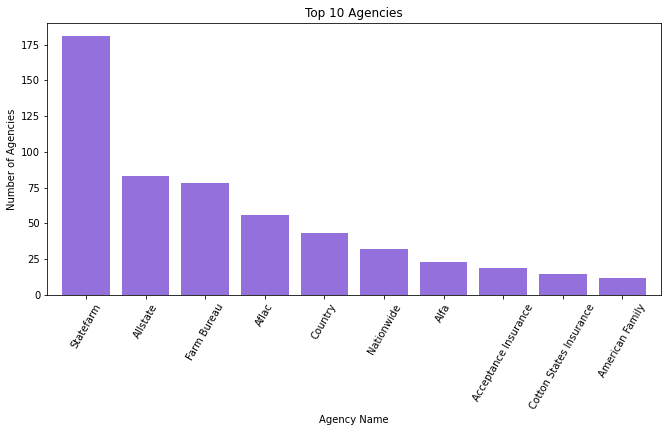

In [43]:
#plotting top 10 agencies and setting title
#changing the color, width, and figure size
bar_plot = top_10.plot(kind='bar', width=0.8, figsize=(11,5), color=['mediumpurple'],  legend=None,title="Top 10 Agencies")

#creating x and y axis
bar_plot.set_xlabel("Agency Name")
bar_plot.set_ylabel("Number of Agencies")

#rotate the agency names
plt.xticks(rotation=60)
plt.show()


In [6]:
merged_file=pd.read_csv("all.csv")
merged_file.head()

,Unnamed: 0,OBJECTID,County,County_Full,totpop10,Reg_Comm,Acres,Sq_Miles,Label,State,...,statefarm,country,farm_bureau,nationwide,alfa,american_family,aflac,acceptance,cotton_states,all_companies
0,0,1,Lanier,Lanier County,10078,Southern Georgia,127874.0,199.802994,LANIER,GA,...,0,0,1,0,0,0,0,0,0,2
1,1,2,Bryan,Bryan County,30233,Coastal Regional Commission,291269.0,455.108002,BRYAN,GA,...,2,0,0,0,0,0,0,0,0,10
2,2,3,Appling,Appling County,18236,Heart of Georgia Altamaha,328037.0,512.557983,APPLING,GA,...,1,1,1,0,0,0,0,0,0,12
3,3,4,Rabun,Rabun County,16276,Georgia Mountains,241186.0,376.854004,RABUN,GA,...,0,0,1,0,0,0,0,0,0,8
4,4,5,Bleckley,Bleckley County,13063,Heart of Georgia Altamaha,140237.0,219.121002,BLECKLEY,GA,...,1,0,0,0,0,0,0,0,0,4


In [7]:
clean_merge = merged_file[['County', 'totpop19', 'accident_count', 'all_companies']]
clean_merge

,County,totpop19,accident_count,all_companies
0,Lanier,10423,4,2
1,Bryan,39627,232,10
2,Appling,18386,15,12
3,Rabun,17137,12,8
4,Bleckley,12873,50,4
...,...,...,...,...
154,Grady,24633,17,9
155,Gordon,57963,234,7
156,Jackson,72977,609,9
157,Whitfield,104628,280,14


In [44]:
merged_file["log_pop"] = np.log(merged_file["totpop19"])
merged_file["log_acc"] = np.log(merged_file["accident_count"])

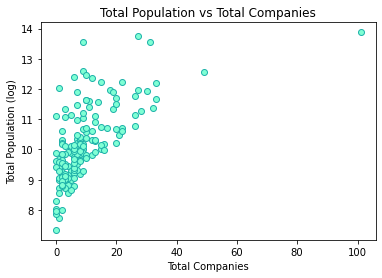

In [45]:
population_agencies = merged_file

plt.title('Total Population vs Total Companies')
plt.scatter(population_agencies['all_companies'], population_agencies['log_pop'], edgecolors='lightseagreen', c='aquamarine')
plt.ylabel('Total Population (log)')
plt.xlabel('Total Companies')
plt.show()

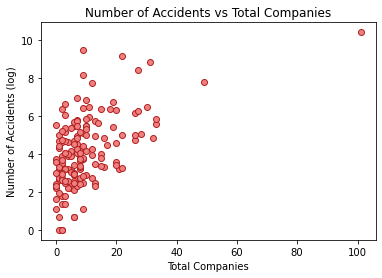

In [46]:
population_agencies = merged_file

plt.title('Number of Accidents vs Total Companies')
plt.scatter(population_agencies['all_companies'], population_agencies['log_acc'], edgecolors='firebrick', c='lightcoral')
plt.ylabel('Number of Accidents (log)')
plt.xlabel('Total Companies')
plt.show()

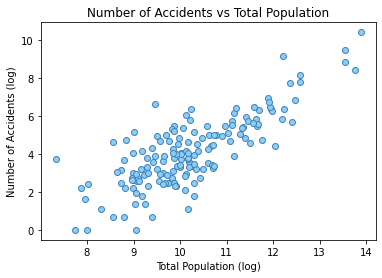

In [47]:
population_agencies = merged_file

plt.title('Number of Accidents vs Total Population')
plt.scatter(population_agencies['log_pop'], population_agencies['log_acc'], edgecolors='steelblue', c='lightskyblue')
plt.ylabel('Number of Accidents (log)')
plt.xlabel('Total Population (log)')
plt.show()